In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from models.vanilla import VanillaModel
from utils.utils import create_data_loaders, freq_to_image
from ext.training import ReconstructionTrainer
from ext.plot import plot_fit

%load_ext autoreload
%autoreload 2

In [2]:
print(torch.cuda.is_available())

False


[2024-05-21 18:09:07]	Running with:
Key              Value                           
seed             0                               
base_path        /storage/downloads/             
data_path        /storage/downloads/fastmri_knee 
device           cpu                             
batch_size       16                              
num_workers      16                              
num_epochs       2                               
report_interval  10                              
drop_rate        0.8                             
learn_mask       False                           
results_root     results                         
lr               0.01                            
mask_lr          0.01                            
val_test_split   0.3                             
optimizer        adam                            
loss             mse                             
model            unet_rec                        
config           ['configs/model/unet.json', 'configs/host/arch.

train_batch:   0%|          | 0/3 [00:00<?, ?it/s]

test_batch:   0%|          | 0/4 [00:00<?, ?it/s]

--- EPOCH 2/2 ---


train_batch:   0%|          | 0/3 [00:00<?, ?it/s]

test_batch:   0%|          | 0/4 [00:00<?, ?it/s]

(<Figure size 1600x1000 with 4 Axes>,
 array([<Axes: title={'center': 'train_loss'}, xlabel='Iteration #', ylabel='Loss'>,
        <Axes: title={'center': 'train_acc'}, xlabel='Epoch #', ylabel='Accuracy (%)'>,
        <Axes: title={'center': 'test_loss'}, xlabel='Iteration #', ylabel='Loss'>,
        <Axes: title={'center': 'test_acc'}, xlabel='Epoch #', ylabel='Accuracy (%)'>],
       dtype=object))

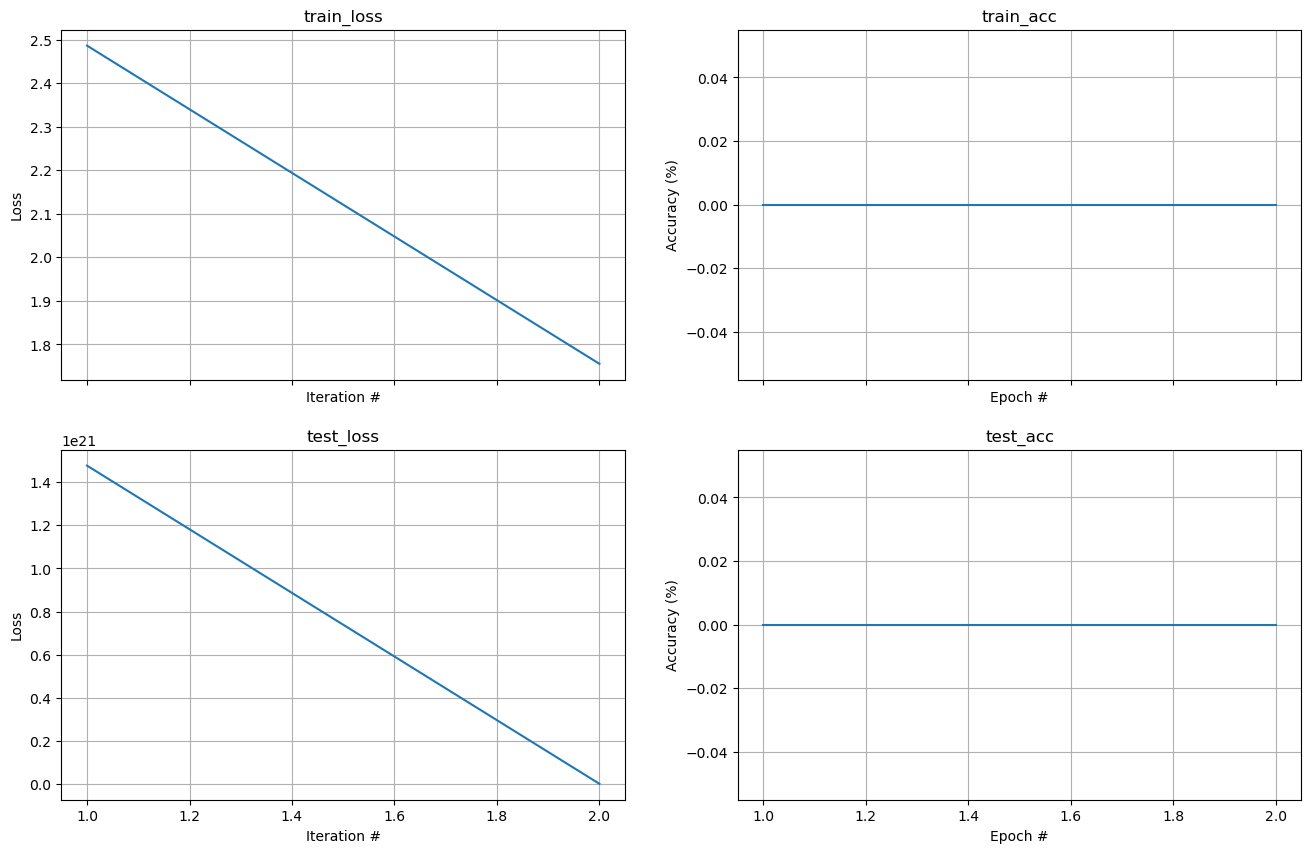

In [3]:
from utils.config import create_arg_parser
from pathlib import Path
from json import load
from utils.runner import ModelRunner

args = create_arg_parser().parse_args("--config configs/model/unet.json --config configs/host/arch.json --num-epochs 2".split())
if args.config:
    for path in args.config:
        with open(path, 'r') as f:
            config = load(f)
            args.__dict__.update(config)
args.data_path = f"{Path(args.base_path) / args.data_path}"
    
runner = ModelRunner(vars(args))
fit_res = runner.fit()

plot_fit(fit_res)

In [12]:
train_res = runner.model(runner.train_loader.dataset[0][0].unsqueeze(0))
train_y = runner.train_loader.dataset[0][1]
test_res = runner.model(runner.test_loader.dataset[0][0].unsqueeze(0))
test_y = runner.test_loader.dataset[0][1]
print(torch.sum(train_res))
print(train_y)
print(torch.sum(test_res))
print(test_y)
print(train_res.shape, test_res.shape)
print(train_y.shape, test_y.shape)
print(runner.loss_fn(train_res.squeeze().squeeze(), train_y), runner.loss_fn(test_res.squeeze().squeeze(), test_y))

tensor(-1.0959e+11, grad_fn=<SumBackward0>)
tensor([[-0.5748, -0.5939, -0.5805,  ..., -0.5978, -0.5782, -0.5912],
        [-0.5887, -0.5929, -0.5979,  ..., -0.5760, -0.5694, -0.5767],
        [-0.5802, -0.5611, -0.5722,  ..., -0.5699, -0.6002, -0.5734],
        ...,
        [-0.5395, -0.5679, -0.5073,  ..., -0.4864, -0.5508, -0.5009],
        [-0.5845, -0.5643, -0.5359,  ..., -0.4869, -0.5056, -0.5231],
        [-0.5132, -0.4989, -0.5055,  ..., -0.5451, -0.5315, -0.5158]])
tensor(-1.5437e+11, grad_fn=<SumBackward0>)
tensor([[-0.4790, -0.4768, -0.3676,  ..., -0.5164, -0.4846, -0.4403],
        [-0.4395, -0.3915, -0.3733,  ..., -0.4097, -0.3964, -0.3687],
        [-0.4526, -0.4405, -0.3674,  ..., -0.4054, -0.4661, -0.3951],
        ...,
        [-0.3830, -0.4239, -0.4878,  ..., -0.4392, -0.4945, -0.5421],
        [-0.4076, -0.4945, -0.4213,  ..., -0.4602, -0.4065, -0.5170],
        [-0.4460, -0.4532, -0.3631,  ..., -0.4194, -0.4277, -0.3548]])
torch.Size([1, 1, 320, 320]) torch.Size([1, 

/home/arad/.conda/envs/project/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([320, 320])) that is different to the input size (torch.Size([1, 320, 320])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
